# Gradient Descent

<p style="font-size:1pt">I have done the same thing, so I try Adam this time.</p>

$$f(x) = \frac{2\cos^2(x) + e^x}{1 + x^2} + 0.01x^4$$ and $$f'(x) = \frac{-4(1+x^2)\sin(x)\cos(x) + e^x(x-1)^2 - 4\cos^2(x)}{(1+x^2)^2} + 0.04x^3$$

## import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## define functions

In [2]:
def f(x):
    return (2*np.cos(x)**2 + np.exp(x))/ (1+x**2) + 0.01*x**4
def g(x):
    return (-4*(1+x**2)*np.sin(x)*np.cos(x) + np.exp(x)*(x-1)**2 - 4*x*np.cos(x)**2) / (1+x**2)**2 + 0.04*x**3

## parameter setting

In [3]:
xlim = [-4, 4]
ylim = [0, 4]
tol = 1e-13
beta_1 = 0.9
beta_2 = 0.999

## define gradient function

In [4]:
path_x = list()
path_y = list()
niter = 0
def gd(initial = 4, lr = 0.1):
    global path_x, path_y, niter
    curr = initial
    prev = initial + 1
    err = prev - curr
    path_x = [curr]
    path_y = [f(curr)]
    m = 0
    v = 0
    niter = 0
    while np.abs(err) > tol and niter < 100000:
        prev = curr
        m = beta_1 * m + (1 - beta_1) * g(curr)
        v = beta_2 * v + (1 - beta_2) * g(curr)**2
        curr -= (lr/np.sqrt((v/(1-beta_2))))*(m/(1-beta_1))
        err = prev - curr
        path_x.append(curr)
        path_y.append(f(curr))
        niter += 1
    return curr

## show with different learning rate

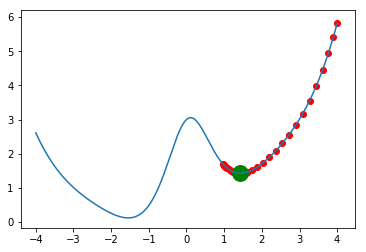

In [19]:
final = gd()
x = np.linspace(*xlim, 1000)
plt.plot(x, f(x))
plt.scatter(path_x,path_y, color = 'r')
plt.scatter(final, f(final), color = 'g', s = 250)

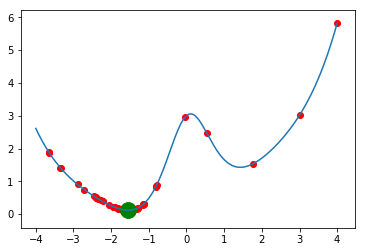

In [20]:
final = gd(lr = 1)
x = np.linspace(*xlim, 1000)
plt.plot(x, f(x))
plt.scatter(path_x,path_y, color = 'r')
plt.scatter(final, f(final), color = 'g', s = 250)